In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker_pick1 = input('Enter your 1st stock or crypto symbol you want to invest: ')
ticker_pick2 = input('Enter your 2nd stock or crypto symbol you want to invest: ')
ticker_pick3 = input('Enter your 3rd stock or crypto symbol you want to invest: ')
ticker_pick4 = input('Enter your 4th stock or crypto symbol you want to invest: ')
ticker_pick5 = input('Enter your 5th stock or crypto symbol you want to invest: ')

Enter your 1st stock or crypto symbol you want to invest:  BTC-USD
Enter your 2nd stock or crypto symbol you want to invest:  DOGE-USD
Enter your 3rd stock or crypto symbol you want to invest:  AAPL
Enter your 4th stock or crypto symbol you want to invest:  AMZN
Enter your 5th stock or crypto symbol you want to invest:  F


In [3]:
print(f'You are investing in {ticker_pick1}, {ticker_pick2}, {ticker_pick3}, {ticker_pick4} and {ticker_pick5}. Good choice!')

You are investing in BTC-USD, DOGE-USD, AAPL, AMZN and F. Good choice!


In [4]:
your_portfolio = [ticker_pick1, ticker_pick2, ticker_pick3, ticker_pick4, ticker_pick5]

In [5]:
your_portfolio_df = yf.download(your_portfolio, start='2019-05-07', end='2021-05-07')

[*********************100%***********************]  5 of 5 completed


In [6]:
your_portfolio_df.tail()

Adj Close                                              \
                  AAPL         AMZN       BTC-USD  DOGE-USD      F   
Date                                                                 
2021-05-03  132.315247  3386.489990  57200.292969  0.441707  11.63   
2021-05-04  127.633202  3311.870117  53333.539062  0.541334  11.41   
2021-05-05  127.882790  3270.540039  57424.007812  0.657633  11.61   
2021-05-06  129.520004  3306.370117  56396.515625  0.580804  11.74   
2021-05-07         NaN          NaN  57356.402344  0.684777    NaN   

                 Close                                              ...  \
                  AAPL         AMZN       BTC-USD  DOGE-USD      F  ...   
Date                                                                ...   
2021-05-03  132.539993  3386.489990  57200.292969  0.441707  11.63  ...   
2021-05-04  127.849998  3311.870117  53333.539062  0.541334  11.41  ...   
2021-05-05  128.100006  3270.540039  57424.007812  0.657633  11.61  ...   
2021-05-06  129.740005  3306.370117  56396.515625  0.580804  11.74  ...   
2021-05-07         NaN          NaN  57356.402344  0.684777    NaN  ...   

                  Open                                              \
                  AAPL         AMZN       BTC-USD  DOGE-USD      F   
Date                                                                 
2021-05-03  132.039993  3484.729980  56620.273438  0.373631  11.56   
2021-05-04  131.190002  3356.189941  57214.179688  0.440274  11.53   
2021-05-05  129.199997  3338.860107  53252.164062  0.537355  11.50   
2021-05-06  127.889999  3270.000000  57441.308594  0.652842  11.55   
2021-05-07         NaN          NaN  56413.953125  0.581110    NaN   

                 Volume                                                     
                   AAPL       AMZN       BTC-USD      DOGE-USD           F  
Date                                                                        
2021-05-03   75135100.0  5875500.0  5.171314e+10  1.052665e+10  61987300.0  
2021-05-04  137564700.0  5439400.0  6.856471e+10  3.823813e+10  71007700.0  
2021-05-05   84000900.0  3711300.0  6.924132e+10  4.252510e+10  41381300.0  
2021-05-06   78128300.0  4447700.0  6.952329e+10  1.898990e+10  50032800.0  
2021-05-07          NaN        NaN  6.843402e+10  2.861508e+10         NaN  

[5 rows x 30 columns]

In [7]:
your_portfolio_returns = np.log(1 + your_portfolio_df['Adj Close'].pct_change())
your_portfolio_returns.dropna(inplace = True)
your_portfolio_returns.tail()

,AAPL,AMZN,BTC-USD,DOGE-USD,F
Date,,,,,
2021-05-03,0.008182,-0.023617,0.010001,0.160935,0.007769
2021-05-04,-0.036027,-0.022281,-0.069994,0.203390,-0.019098
2021-05-05,0.001954,-0.012558,0.073897,0.194611,0.017377
2021-05-06,0.012721,0.010896,-0.018055,-0.124234,0.011135
2021-05-07,0.000000,0.000000,0.016877,0.164680,0.000000


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

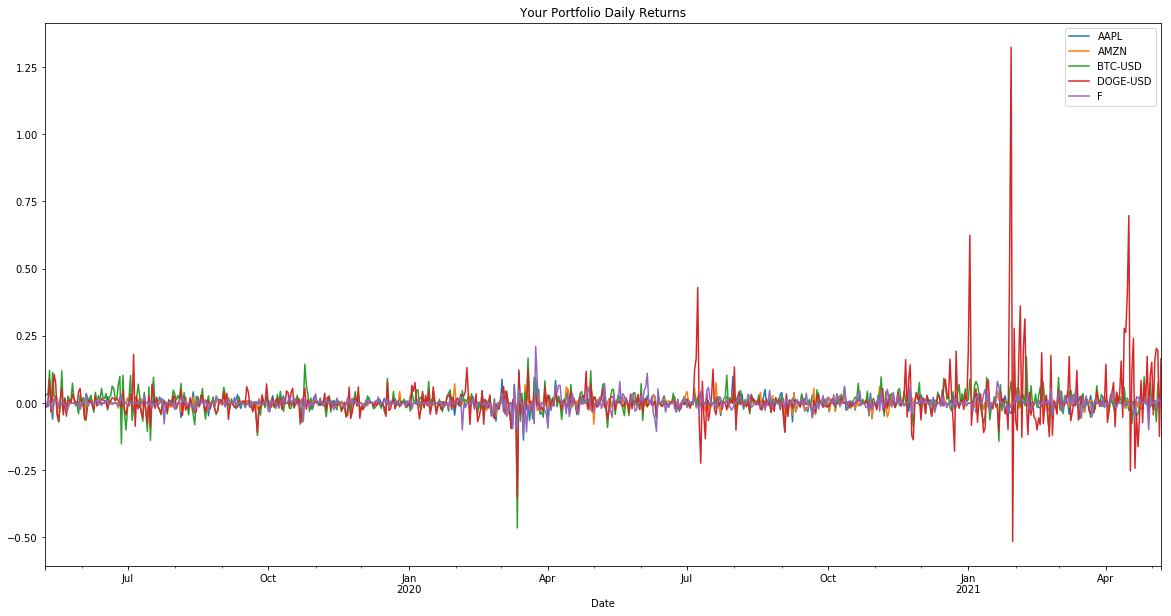

In [8]:
# Plot daily returns of all portfolios
your_portfolio_returns.plot( title="Your Portfolio Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

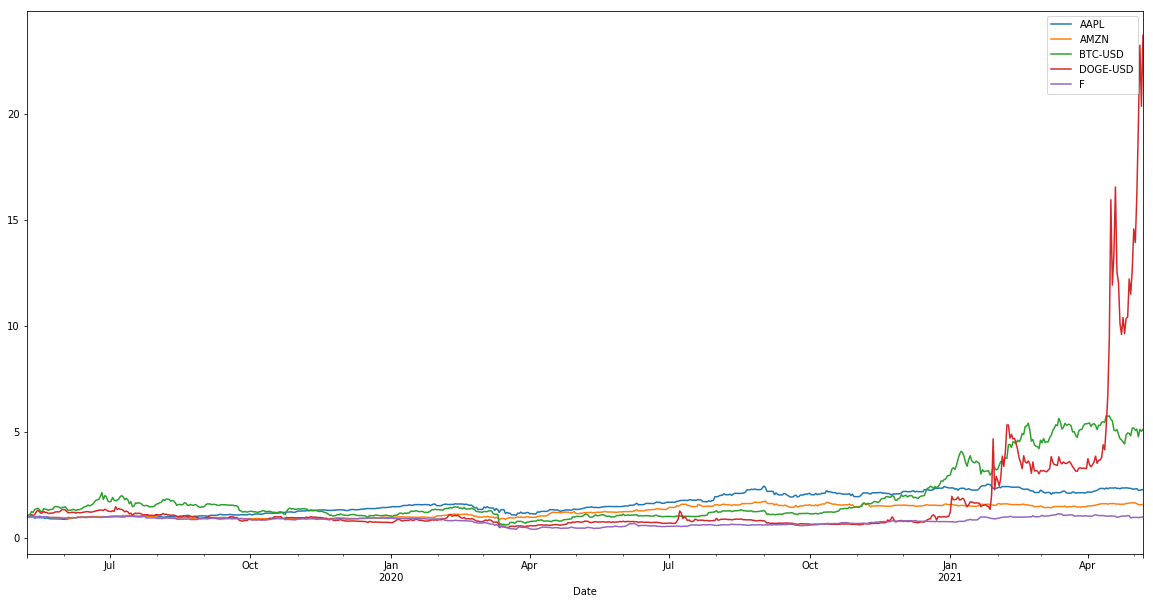

In [9]:
# Calculate cumulative returns of all portfolios
your_portfolio_cumulative_returns = (1 + your_portfolio_returns).cumprod()

# Plot cumulative returns
your_portfolio_cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


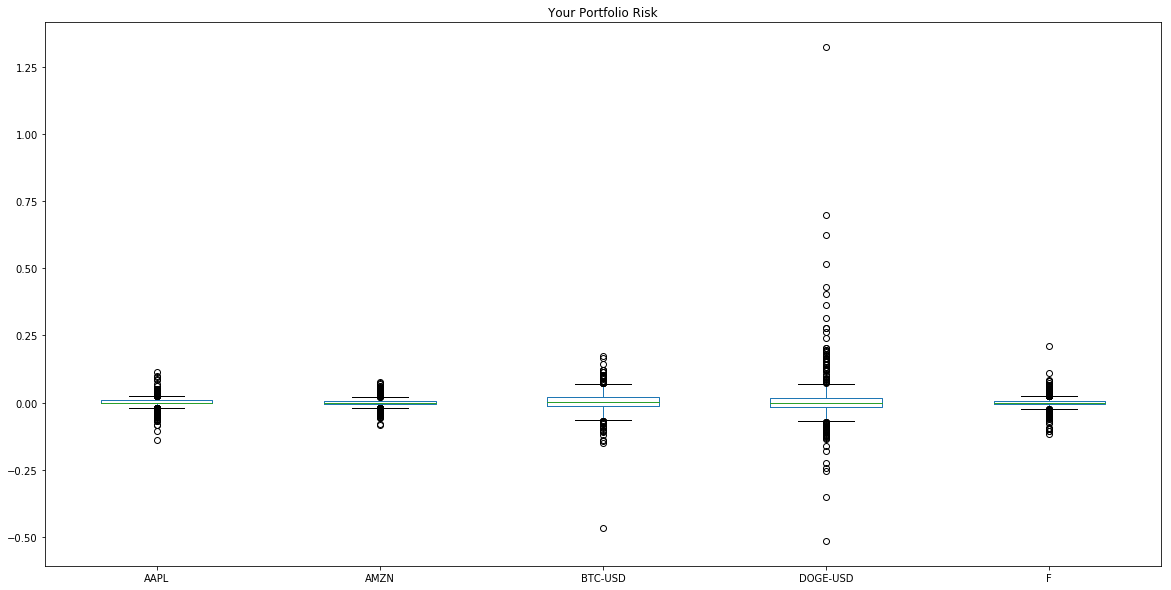

In [10]:
# Box plot to visually show risk
your_portfolio_returns.plot.box(title="Your Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [11]:
# Calculate the daily standard deviations of all portfolios
your_portfolio_daily_std = your_portfolio_returns.std().sort_values(ascending=False)
your_portfolio_daily_std

DOGE-USD    0.090027
BTC-USD     0.040723
F           0.023815
AAPL        0.019865
AMZN        0.016405
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [12]:
# Calculate the daily standard deviation of S&P 500
btc_usd_std = your_portfolio_daily_std['BTC-USD']

# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_btc_usd = your_portfolio_daily_std > btc_usd_std
portfolios_riskier_than_btc_usd

DOGE-USD     True
BTC-USD     False
F           False
AAPL        False
AMZN        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [13]:
# Calculate the annualized standard deviation (252 trading days)
your_portfolio_annualized_std = your_portfolio_daily_std *np.sqrt(252)
your_portfolio_annualized_std.sort_values(ascending=False)

DOGE-USD    1.429140
BTC-USD     0.646452
F           0.378057
AAPL        0.315348
AMZN        0.260415
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

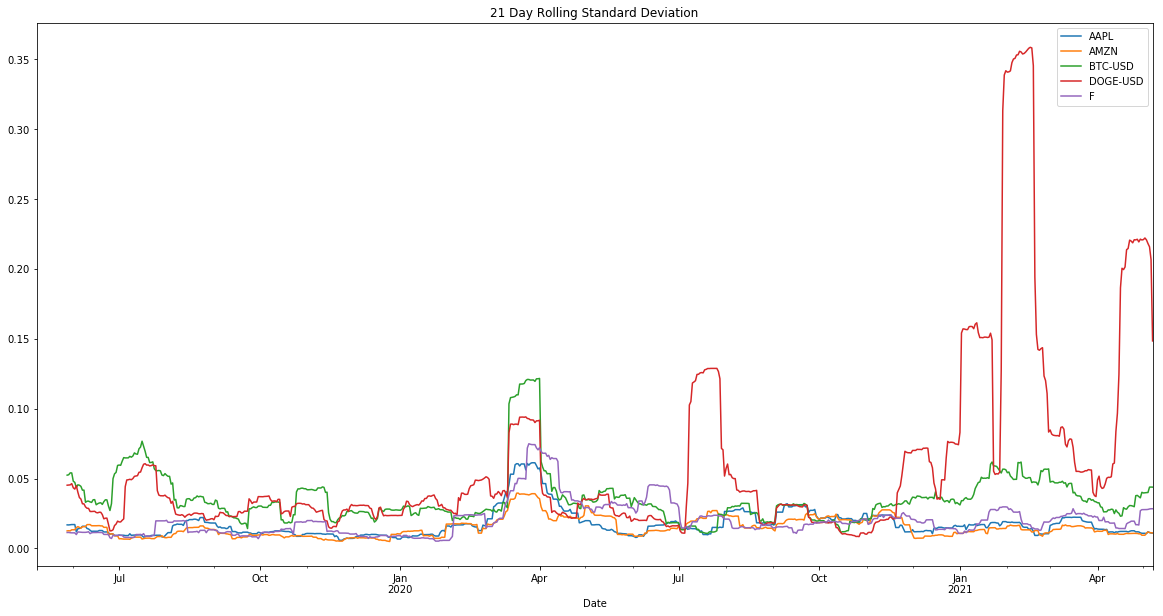

In [14]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
your_portfolio_rolling21_std = your_portfolio_returns.rolling(window=21).std()

# Plot the rolling standard deviation
your_portfolio_rolling21_std.plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [15]:
# Calculate the correlation
your_portfolio_correlation = your_portfolio_returns.corr()

# Display de correlation matrix
your_portfolio_correlation

,AAPL,AMZN,BTC-USD,DOGE-USD,F
AAPL,1.000000,0.689964,0.206340,0.021536,0.392935
AMZN,0.689964,1.000000,0.203115,0.052122,0.186621
BTC-USD,0.206340,0.203115,1.000000,0.333012,0.104499
DOGE-USD,0.021536,0.052122,0.333012,1.000000,0.033252
F,0.392935,0.186621,0.104499,0.033252,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [16]:
# Calculate covariance of a single portfolio
btc_usd_covariance = your_portfolio_returns['BTC-USD'].cov(your_portfolio_returns['TSLA'])

# Calculate variance of S&P 500
tsla_variance = your_portfolio_returns['TSLA'].rolling(window=60).var()

# Computing beta
btc_usd_beta_tsla = btc_usd_covariance/tsla_variance

# Plot beta trend
btc_usd_beta_tsla.plot(title="Bitcoin Beta Trend", figsize=(20, 10))


KeyError: 'TSLA'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = your_portfolio_returns.ewm(halflife=21, adjust=True).std().plot(title="21-Day Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (your_portfolio_returns.mean() * 252) / (your_portfolio_returns.std() * np.sqrt(252))
annualized_sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios") 